# **Loan Status Prediction Model**

### **Libraries Used**

In [2]:
# Dataset Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Model Export
import pickle

### **Dataset Load**

In [3]:
df = pd.read_csv('dataset/loan_data_1.csv')
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,LP002953,Male,Yes,3+,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,377,LP002974,Male,Yes,0,Graduate,No,3232.0,NaN,108.0,360.0,1.0,Rural,Y
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,379,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y


### **Data Preprocessing 1**

#### **Dataset About**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [5]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [6]:
df.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

#### **New Dataset**

In [8]:
df_new = df.copy()

In [9]:
df_new.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df_new.rename(columns={'ApplicantIncome':'Applicant_Income', 
                        'CoapplicantIncome':'Coapplicant_Income', 
                        'LoanAmount':'Loan_Amount'},inplace=True)

In [11]:
df_new.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [12]:
# Unwanted Column
df_new = df_new.drop(columns=['Unnamed: 0','Loan_ID'])

In [13]:
df_new['Loan_Status'] = df_new['Loan_Status'].map({'N':0,'Y':1})
df_new['Loan_Amount'] *= 1000

In [14]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000.0,0.0,141000.0,360.0,1.0,Urban,1
4,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95000.0,360.0,1.0,Urban,1


#### **Missing Value Handling**

In [15]:
for i in df_new:
    if df_new[i].dtype == "object" or i in ['Loan_Amount_Term','Credit_History']:
        df_new[i] = df_new[i].fillna(df_new[i].mode()[0])
    else:
        df_new[i] = df_new[i].fillna(df_new[i].mean())

In [16]:
df_new.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### **Outlier Detection**

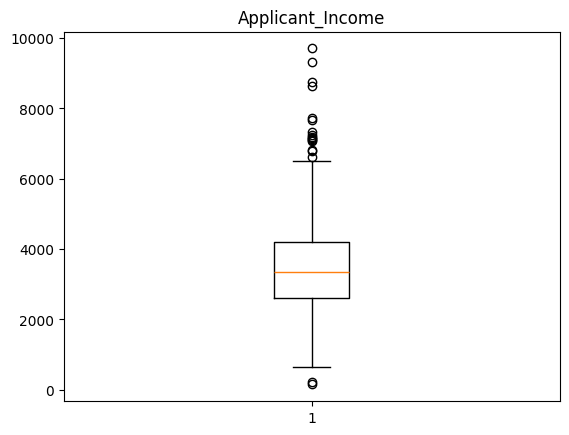

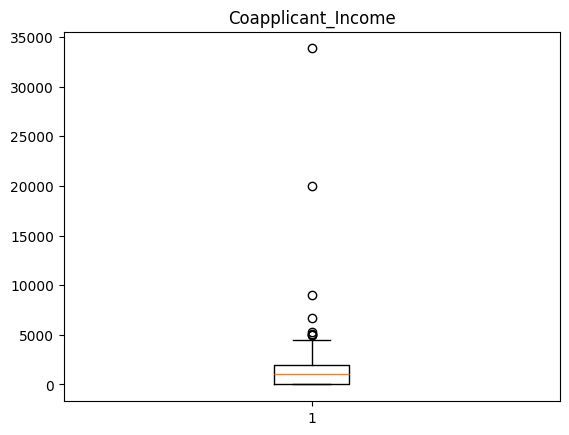

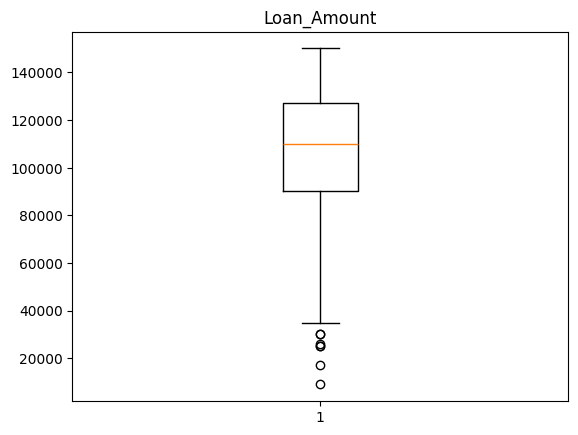

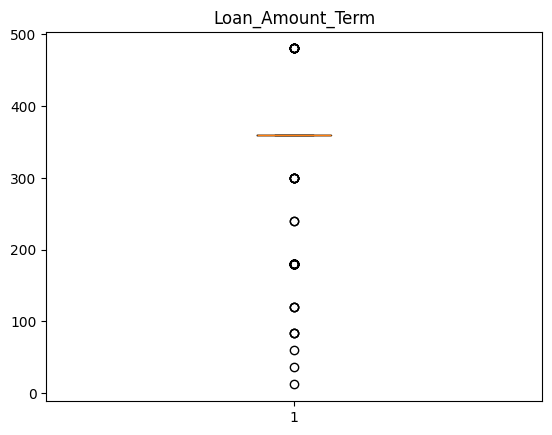

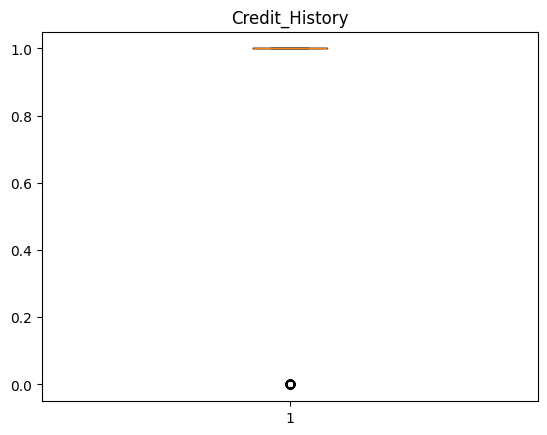

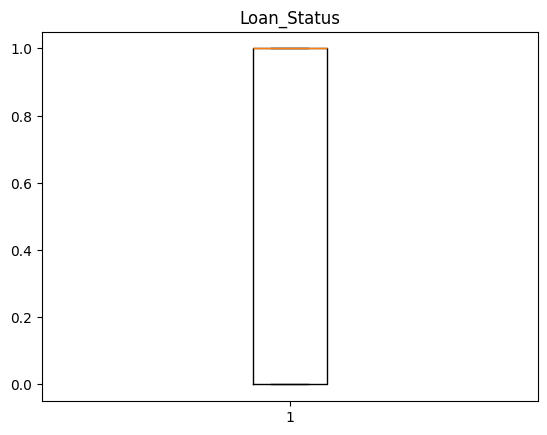

In [17]:
for i in df_new.select_dtypes('number').columns:
    plt.title(i)
    plt.boxplot(df_new[i])
    plt.show()
    print()

* Applicant Income above 8000
* Co-Applicant earning more than applicant
* Loan Amount below 20
* Loan Term above 400 below 100

In [18]:
for i in df_new.select_dtypes('object').columns:
    print(df_new[i].value_counts())
    print()

Gender
Male      296
Female     85
Name: count, dtype: int64

Married
Yes    228
No     153
Name: count, dtype: int64

Dependents
0     242
2      59
1      52
3+     28
Name: count, dtype: int64

Education
Graduate        280
Not Graduate    101
Name: count, dtype: int64

Self_Employed
No     346
Yes     35
Name: count, dtype: int64

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64



#### **Outlier Handling**

In [19]:
df_cleaned = df_new.copy()
df_cleaned

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.000000,128000.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000.0,0.000000,66000.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583.0,2358.000000,120000.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000.0,0.000000,141000.0,360.0,1.0,Urban,1
4,Male,Yes,0,Not Graduate,No,2333.0,1516.000000,95000.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703.0,0.000000,128000.0,360.0,1.0,Urban,1
377,Male,Yes,0,Graduate,No,3232.0,1267.005289,108000.0,360.0,1.0,Rural,1
378,Female,No,0,Graduate,No,2900.0,0.000000,71000.0,360.0,1.0,Rural,1
379,Male,Yes,3+,Graduate,No,4106.0,0.000000,40000.0,180.0,1.0,Rural,1


In [20]:
df_cleaned = df_cleaned[(df_cleaned['Coapplicant_Income'] <= 8000) &
                        (df_cleaned['Loan_Amount'] >= 20) &
                        (df_cleaned['Loan_Amount_Term'] >= 20) & 
                        (df_cleaned['Loan_Amount_Term'] < 400)]

In [21]:
df_cleaned.loc[:,'Dependents'] = df_cleaned['Dependents'].replace("3+", "3")
df_cleaned['Dependents'] = df_cleaned['Dependents'].astype(int)

C:\Users\vaisa\AppData\Local\Temp\ipykernel_3744\499771115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dependents'] = df_cleaned['Dependents'].astype(int)


In [22]:
df_cleaned.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.677596,3597.352659,1110.934453,104918.889817,338.000000,0.857923,0.721311
std,0.990304,1404.559471,1246.681502,28449.939260,62.213948,0.349607,0.448968
min,0.000000,150.000000,0.000000,9000.000000,36.000000,0.000000,0.000000
25%,0.000000,2656.250000,0.000000,90000.000000,360.000000,1.000000,0.000000
50%,0.000000,3399.500000,1036.000000,110000.000000,360.000000,1.000000,1.000000
75%,1.000000,4197.750000,1926.000000,127000.000000,360.000000,1.000000,1.000000
max,3.000000,9703.000000,6666.000000,150000.000000,360.000000,1.000000,1.000000


In [23]:
df_cleaned

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.000000,128000.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000.0,0.000000,66000.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583.0,2358.000000,120000.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000.0,0.000000,141000.0,360.0,1.0,Urban,1
4,Male,Yes,0,Not Graduate,No,2333.0,1516.000000,95000.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3,Graduate,No,5703.0,0.000000,128000.0,360.0,1.0,Urban,1
377,Male,Yes,0,Graduate,No,3232.0,1267.005289,108000.0,360.0,1.0,Rural,1
378,Female,No,0,Graduate,No,2900.0,0.000000,71000.0,360.0,1.0,Rural,1
379,Male,Yes,3,Graduate,No,4106.0,0.000000,40000.0,180.0,1.0,Rural,1


### **EDA**

In [24]:
df_eda = df_cleaned.copy()

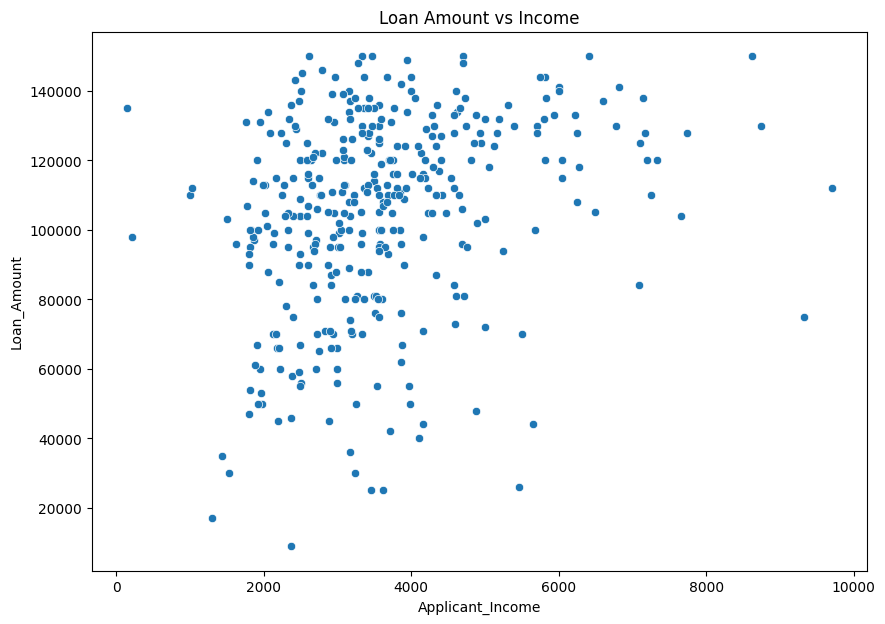

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_eda['Applicant_Income'],y=df_eda['Loan_Amount'])
plt.title('Loan Amount vs Income')
plt.show()

* less income people are taking more loan

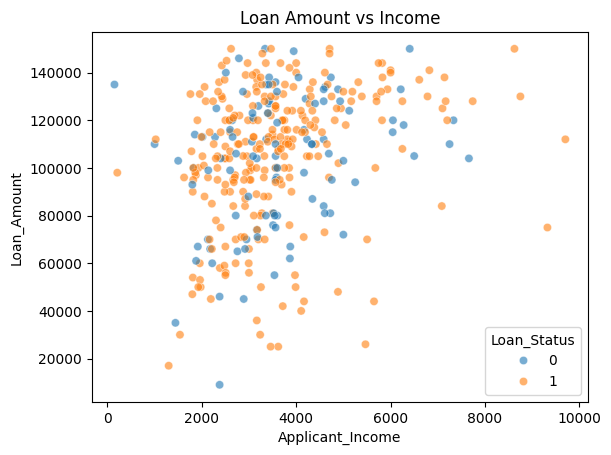

In [26]:
sns.scatterplot(x='Applicant_Income', y='Loan_Amount', hue='Loan_Status', data=df_eda, alpha=0.6)
plt.title('Loan Amount vs Income')
plt.show()

* Most approved loans are on income category under `0.8*1e7`.
* How is higher income people getting rejected for loan?
* Should try removing the income level above `0.9*1e7` or `1e7`.

<Axes: >

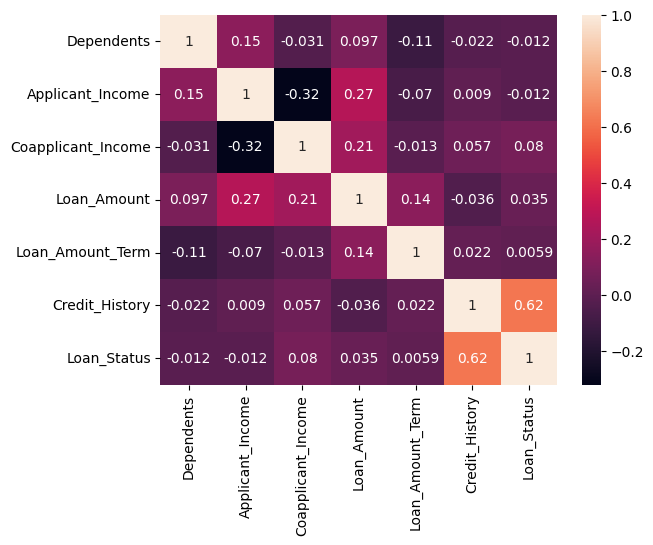

In [27]:
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True)

### **Data Preprocessing 2**

#### **Model Dictionary**

In [28]:
model_dict = {}

#### **Features & Label**

In [29]:
x = df_cleaned.drop(columns=['Loan_Status'])
y = df_cleaned['Loan_Status']

#### **Imbalance Handling**

In [30]:
y.value_counts()

Loan_Status
1    264
0    102
Name: count, dtype: int64

In [31]:
ros = RandomOverSampler()
x_res,y_res = ros.fit_resample(x,y)

In [32]:
y_res.value_counts()

Loan_Status
0    264
1    264
Name: count, dtype: int64

#### **Data Splitting**

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.1,random_state=42)

#### **Data Encoding**

In [34]:
obj_cols = x_train.select_dtypes('object').columns
obj_cols

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [35]:
le_gender = LabelEncoder()
x_train['Gender'] = le_gender.fit_transform(x_train['Gender'])

le_married = LabelEncoder()
x_train['Married'] = le_married.fit_transform(x_train['Married'])

le_education = LabelEncoder()
x_train['Education'] = le_education.fit_transform(x_train['Education'])

le_self_employed = LabelEncoder()
x_train['Self_Employed'] = le_self_employed.fit_transform(x_train['Self_Employed'])

le_property_area = LabelEncoder()
x_train['Property_Area'] = le_property_area.fit_transform(x_train['Property_Area'])

In [36]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
470,1,1,0,0,0,3539.000000,1376.0,55000.0,360.0,1.0,0
497,1,1,1,0,1,1000.000000,3022.0,110000.0,360.0,1.0,2
479,0,0,1,1,0,4606.000000,0.0,81000.0,360.0,1.0,0
514,0,0,0,1,0,3563.422764,0.0,95000.0,360.0,1.0,0
286,1,0,0,0,0,6000.000000,0.0,140000.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,0,1,0,7333.000000,0.0,120000.0,360.0,1.0,0
106,1,1,0,0,0,4600.000000,0.0,73000.0,180.0,1.0,1
270,1,0,3,1,0,4707.000000,1993.0,148000.0,360.0,1.0,1
435,1,1,3,1,0,2947.000000,1664.0,70000.0,180.0,0.0,2


In [37]:
model_dict['gender'] = le_gender
model_dict['married'] = le_married
model_dict['education'] = le_education
model_dict['self_employed'] = le_self_employed
model_dict['property_area'] = le_property_area

model_dict

{'gender': LabelEncoder(),
 'married': LabelEncoder(),
 'education': LabelEncoder(),
 'self_employed': LabelEncoder(),
 'property_area': LabelEncoder()}

#### **Correlation Check**

In [38]:
df_encoded = x_train.join(y_train)
df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
470,1,1,0,0,0,3539.000000,1376.0,55000.0,360.0,1.0,0,0
497,1,1,1,0,1,1000.000000,3022.0,110000.0,360.0,1.0,2,0
479,0,0,1,1,0,4606.000000,0.0,81000.0,360.0,1.0,0,0
514,0,0,0,1,0,3563.422764,0.0,95000.0,360.0,1.0,0,0
286,1,0,0,0,0,6000.000000,0.0,140000.0,360.0,1.0,0,1


In [39]:
df_encoded.corr(numeric_only=True)['Loan_Status'].sort_values(ascending=False)

Loan_Status           1.000000
Credit_History        0.539898
Coapplicant_Income    0.106080
Married               0.096089
Property_Area         0.083033
Gender                0.038608
Loan_Amount           0.031463
Loan_Amount_Term      0.020762
Dependents            0.007480
Applicant_Income     -0.012344
Education            -0.034942
Self_Employed        -0.057421
Name: Loan_Status, dtype: float64

#### **Normalization**

In [40]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [41]:
model_dict['scaler'] = scaler
model_dict

{'gender': LabelEncoder(),
 'married': LabelEncoder(),
 'education': LabelEncoder(),
 'self_employed': LabelEncoder(),
 'property_area': LabelEncoder(),
 'scaler': StandardScaler()}

#### **Test Data Transform**

In [42]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
158,Male,No,0,Graduate,Yes,5166.0,0.0,128000.000000,360.0,1.0,Semiurban
395,Male,Yes,0,Not Graduate,No,3074.0,1800.0,123000.000000,360.0,0.0,Semiurban
6,Male,Yes,2,Graduate,No,2500.0,1840.0,109000.000000,360.0,1.0,Urban
417,Male,Yes,1,Graduate,No,1880.0,0.0,61000.000000,360.0,1.0,Rural
79,Male,No,0,Graduate,No,2014.0,1929.0,104914.209115,360.0,1.0,Urban


In [43]:
model_dict

{'gender': LabelEncoder(),
 'married': LabelEncoder(),
 'education': LabelEncoder(),
 'self_employed': LabelEncoder(),
 'property_area': LabelEncoder(),
 'scaler': StandardScaler()}

In [44]:
x_test['Gender'] = model_dict['gender'].transform(x_test['Gender'])
x_test['Married'] = model_dict['married'].transform(x_test['Married'])
x_test['Education'] = model_dict['education'].transform(x_test['Education'])
x_test['Self_Employed'] = model_dict['self_employed'].transform(x_test['Self_Employed'])
x_test['Property_Area'] = model_dict['property_area'].transform(x_test['Property_Area'])

In [45]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
158,1,0,0,0,1,5166.0,0.0,128000.000000,360.0,1.0,1
395,1,1,0,1,0,3074.0,1800.0,123000.000000,360.0,0.0,1
6,1,1,2,0,0,2500.0,1840.0,109000.000000,360.0,1.0,2
417,1,1,1,0,0,1880.0,0.0,61000.000000,360.0,1.0,0
79,1,0,0,0,0,2014.0,1929.0,104914.209115,360.0,1.0,2


### **Model Selection**

In [46]:
models = [KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]

for i in models:
    print(i)
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    # print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.52      0.75      0.61        20
           1       0.79      0.58      0.67        33

    accuracy                           0.64        53
   macro avg       0.65      0.66      0.64        53
weighted avg       0.69      0.64      0.65        53


SVC()
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        20
           1       0.00      0.00      0.00        33

    accuracy                           0.38        53
   macro avg       0.19      0.50      0.27        53
weighted avg       0.14      0.38      0.21        53


GaussianNB()
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       0.73      0.82      0.77        33

    accuracy                           0.70        53
   macro avg       0.68      0.66      0.66        53
weighted avg       0.69      0

c:\Users\vaisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vaisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vaisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

* Decision Tree already provides the best performance (95%)
* Lets try Ensemble techniques also also

### **Ensemble Techniques**

In [47]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.94      0.94      0.94        33

    accuracy                           0.92        53
   macro avg       0.92      0.92      0.92        53
weighted avg       0.92      0.92      0.92        53



In [48]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.94      0.88      0.91        33

    accuracy                           0.89        53
   macro avg       0.88      0.89      0.88        53
weighted avg       0.89      0.89      0.89        53



* Random Forest gives best result 96%

### **Hyperparameter Tuning**

In [49]:
params = {
    'n_estimators': [100, 200],            
    'max_depth': [10, 20, None],           
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],        
    'max_features': ['sqrt', 'log2'],      
    'bootstrap': [True, False]             
}

In [50]:
rscv = RandomizedSearchCV(rfc,params,cv=5,scoring="accuracy")
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='accuracy')

In [51]:
rscv = GridSearchCV(rfc,params,cv=5,scoring="accuracy")
rscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [52]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',n_estimators=200)
# rfc = RandomForestClassifier(bootstrap=False, max_features='log2')
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.94      0.97      0.96        33

    accuracy                           0.94        53
   macro avg       0.94      0.93      0.94        53
weighted avg       0.94      0.94      0.94        53



### **Cross Validation**

In [53]:
cvs = cross_val_score(rfc,x_train,y_train,cv=5,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.97894737 0.93684211 0.94736842 0.94736842 0.89473684]
0.9410526315789474


In [54]:
model_dict['model'] = rfc

### **Model Export**

In [55]:
model_dict
with open('Loan_Status_Model_old.pkl','wb') as f:
    pickle.dump(model_dict,f)

In [56]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')